Use the Verlet method to calculate the orbit of the Earth around the Sun. The equations of motion for the position $(x(t),y(t))$ of the planet in its orbital plane are: $$\frac{d^{2}x(t)}{dt^{2}}=-G\,M\,\frac{x(t)}{r^{3}},\;\frac{d^{2}y(t)}{dt^{2}}=-G\,M\,\frac{y(t)}{r^{3}},$$ where $r=\sqrt{x^{2}+y^{2}}$.

### Data:
Use $G = 6.6738 \times 10^{-11} \, \text{m}^3\text{kg}^{-1}\text{s}^{-2}$ as Newton's gravitational constant, $M = 1.9891 \times 10^{30} \, \text{kg}$ as the mass of the Sun. For Earth's mass, use $m = 5.9722 \times 10^{24} \, \text{kg}$. The initial conditions should be $ \mathbf{r}_0 = (1.521 \times 10^{11}, 0) \, \text{m}$ and $\mathbf{v}_0 = (0, 2.9291 \times 10^4) \, \text{m/s}$. Time evaluation points are provided in the task description, and note that you are working in SI units.


### Tasks:
1. Calculating the Earth's Orbit and Energies:

    **(a)** Calculate the orbit of the Earth around the Sun in steps of one hour for a total period of three years (assume 1 year has 365 days).

    **(b)** Use the solution for the orbit, $r(t)$, and the velocity, $v(t)$, to calculate additionally the potential and kinetic energy of Earth at each evaluation point.

    **(c)** Create a function `potentialEnergy(r, par)` which calculates the potential energy of the Earth given its location $r(t)$ and parameters `par`.

    **(d)** Create a function `kineticEnergy(v, par)` which calculates the kinetic energy of the Earth given its velocity $v(t)$ and parameters `par`.

    **(e)** Create a function `solve(par)` which returns the value arrays for $r(t)$ and $v(t)$ as a tuple. This function should solve the ODEs for the Earth's orbit and velocity.

    **(f)** Ensure that the variable `par` is a tuple containing the required constant values in the order $(G, M, m)$, defined in `Data` section above, where:
    - $G$ is the gravitational constant,
    - $M$ is the mass of the Sun,
    - $m$ is the mass of the Earth.

    **(g)** Implement tests that call `solve(par)` and use the results to verify the calculations of potential and kinetic energy.

2. **Create two plots:** 

    **(a)** draw the kinetic energy, potential energy and total energy, superimposed on a single canvas and observe how the kinetic and potential energies change as a function of time while the total energy appears to be constant. Note that working in SI units means you will get large numbers of the order $10^{33}$ J.

    **(b)** Plot only the total energy as a function of time and observe the oscillating character while the mean remains constant to high precision which demonstrates the inherent energy conservation of the Verlet method.

### Note:
You may wish to solve the problem using `solve_ivp()` but that is not recommended. It is entirely possible and possibly illuminating in comparison(!) to the Verlet method but effectively similar effort for worse results. The tests are likely to fail and deduct marks for this case.


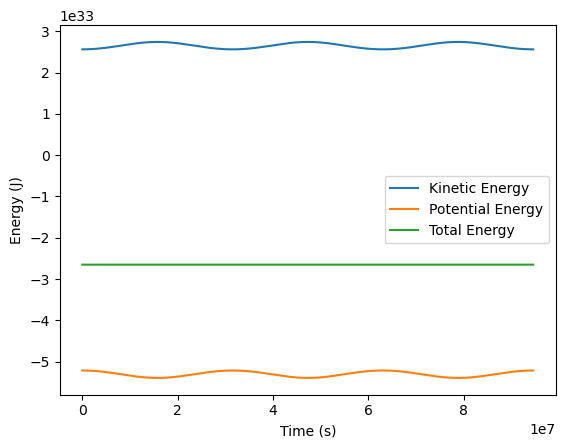

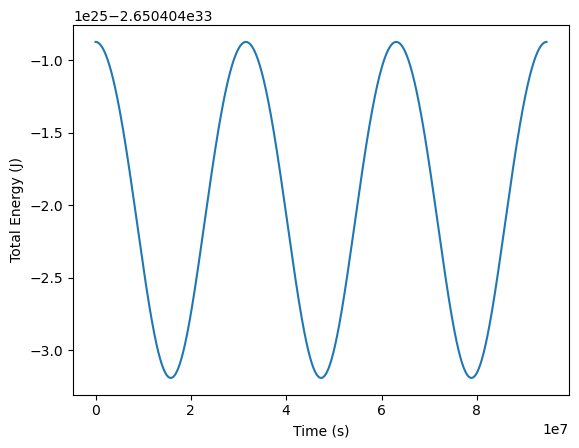

In [1]:
"""
Earth orbit simulation using the velocity Verlet method.
Computes trajectory, kinetic energy, potential energy,
and demonstrates energy conservation.
"""

import math
import numpy as np
import matplotlib.pyplot as plt


def acceleration(r, par):
    G, M, _ = par
    x, y = r
    dist = math.sqrt(x**2 + y**2)
    factor = -G * M / dist**3
    return np.array([factor * x, factor * y])


def verlet(r0, v0, N, dt, par):
    r = np.zeros((N, 2))
    v = np.zeros((N, 2))

    r[0] = r0
    v[0] = v0

    a = acceleration(r[0], par)
    v_half = v[0] + 0.5 * dt * a

    for i in range(N - 1):
        r[i + 1] = r[i] + dt * v_half
        a_new = acceleration(r[i + 1], par)
        v[i + 1] = v_half + 0.5 * dt * a_new
        v_half = v_half + dt * a_new

    return r, v


def potentialEnergy(r, par):
    G, M, m = par
    dist = np.linalg.norm(r, axis=1)
    return -G * M * m / dist


def kineticEnergy(v, par):
    _, _, m = par
    speed2 = np.sum(v**2, axis=1)
    return 0.5 * m * speed2


def solve(par):
    dt = 3600
    T = 3 * 365 * 24 * 3600
    N = int(T / dt)

    r0 = np.array([1.521e11, 0.0])
    v0 = np.array([0.0, 2.9291e4])

    return verlet(r0, v0, N, dt, par)


# parameters
par = (6.6738e-11, 1.9891e30, 5.9722e24)

r, v = solve(par)

P = potentialEnergy(r, par)
K = kineticEnergy(v, par)
E = P + K

t = np.arange(len(E)) * 3600

plt.plot(t, K, label="Kinetic Energy")
plt.plot(t, P, label="Potential Energy")
plt.plot(t, E, label="Total Energy")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.legend()
plt.show()

plt.plot(t, E)
plt.xlabel("Time (s)")
plt.ylabel("Total Energy (J)")
plt.show()
